In [ ]:
import tensorflow as tf

# cria um tensor com um valor inicial que pode ser modificado, 
# como qualquer var no python
x = tf.Variable(5)

# Esse tensor guarda o estado em uma sessão, 
# então é necessário inicializar o estado do tensor manualmente. 
# global_variables_initializer() --> retorna uma operação que irá inicializar todas as variáveis TensorFlow do grafo.
# chamamos uma operação usando uma sessão para inicializar todas as variáveis tal como mostrado acima. 
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
# Usando a classe tf.Variable permite que mudemos os pesos e o viés, mas os valores iniciais precisam ser escolhidos.
# Inicializando os pesos com números aleatórios a partir de uma distribuição normal é uma boa prática. 
# Randomizar os pesos ajuda o modelo a não ficar preso sempre no mesmo lugar toda vez que for treinado.
# tf.truncated_normal() = retorna um tensor com valores aleatórios vindos de uma distribuição normal cuja magnitude é de não mais que 2 desvios padrão da média.
n_features = 120
n_labels = 5
weights = tf.Variable(tf.truncated_normal((n_features, n_labels)))

# IMPORTANTE ao randomizar os pesos, não é necessário randomizar o viés, então o mais simples é igualar o viés a 0
# tf.zeros retorna um tensor composto de zeros em função a quantidade de labels
bias = tf.Variable(tf.zeros(n_labels))

# IMPORTANTE quando multiplicamos matriz, não usamo o tf.multiply(), usamos tf.matmul()

# Exemplo de Código de classificação de imagens
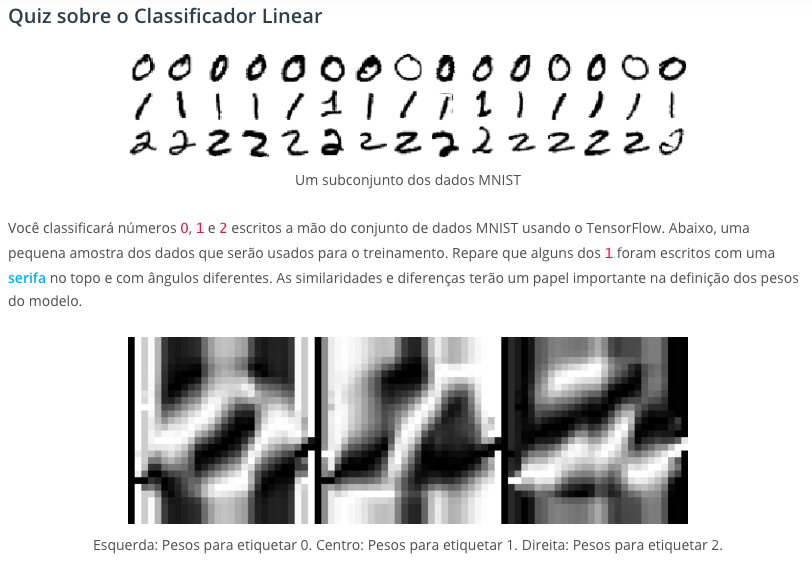

In [1]:
# Quiz Solution
# Note: You can't run code in this tab
import tensorflow as tf

def get_weights(n_features, n_labels):
    """
    Return TensorFlow weights
    :param n_features: Number of features
    :param n_labels: Number of labels
    :return: TensorFlow weights
    """
    # TODO: Return weights
    return tf.Variable(tf.truncated_normal((n_features, n_labels)))


def get_biases(n_labels):
    """
    Return TensorFlow bias
    :param n_labels: Number of labels
    :return: TensorFlow bias
    """
    # TODO: Return biases
    return tf.Variable(tf.zeros(n_labels))


def linear(input, w, b):
    """
    Return linear function in TensorFlow
    :param input: TensorFlow input
    :param w: TensorFlow weights
    :param b: TensorFlow biases
    :return: TensorFlow linear function
    """
    # TODO: Linear Function (xW + b)
    return tf.add(tf.matmul(input, w), b)

In [2]:
import tensorflow as tf
# Sandbox Solution
# Note: You can't run code in this tab
from tensorflow.examples.tutorials.mnist import input_data
from quiz import get_weights, get_biases, linear


def mnist_features_labels(n_labels):
    """
    Gets the first <n> labels from the MNIST dataset
    :param n_labels: Number of labels to use
    :return: Tuple of feature list and label list
    """
    mnist_features = []
    mnist_labels = []

    mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

    # In order to make quizzes run faster, we're only looking at 10000 images
    for mnist_feature, mnist_label in zip(*mnist.train.next_batch(10000)):

        # Add features and labels if it's for the first <n>th labels
        if mnist_label[:n_labels].any():
            mnist_features.append(mnist_feature)
            mnist_labels.append(mnist_label[:n_labels])

    return mnist_features, mnist_labels


# Number of features (28*28 image is 784 features)
n_features = 784
# Number of labels
n_labels = 3

# Features and Labels
features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

# Weights and Biases
w = get_weights(n_features, n_labels)
b = get_biases(n_labels)

# Linear Function xW + b
logits = linear(features, w, b)

# Training data
train_features, train_labels = mnist_features_labels(n_labels)

with tf.Session() as session:
    session.run(tf.global_variables_initializer())

    # Softmax
    prediction = tf.nn.softmax(logits)

    # Cross entropy
    # This quantifies how far off the predictions were.
    # You'll learn more about this in future lessons.
    cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

    # Training loss
    # You'll learn more about this in future lessons.
    loss = tf.reduce_mean(cross_entropy)

    # Rate at which the weights are changed
    # You'll learn more about this in future lessons.
    learning_rate = 0.08

    # Gradient Descent
    # This is the method used to train the model
    # You'll learn more about this in future lessons.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # Run optimizer and get loss
    _, l = session.run(
        [optimizer, loss],
        feed_dict={features: train_features, labels: train_labels})

# Print loss
print('Loss: {}'.format(l))


ModuleNotFoundError: No module named 'quiz'

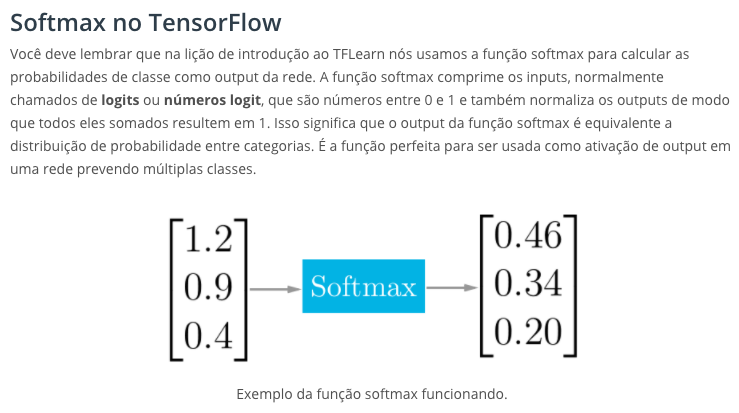

In [ ]:
def run():
    output = None
    logit_data = [2.0, 1.0, 0.1]
    logits = tf.placeholder(tf.float32)
    
    # TODO: Calculate the softmax of the logits
    softmax = tf.nn.softmax(logit_data)
    
    with tf.Session() as sess:
        # TODO: Feed in the logit data
        output = sess.run(softmax, feed_dict={logits: logit_data})

    return output

## 13 L Codificação Binária
### Codificação Binária Com O Scikit-Learn
Transformar suas etiquetas em vetores com codificação binária (que significa que o resultado é true(1)/false(0)) é muito simples com o scikit-lear usando o LabelBinarizer. Dê uma olhada abaixo!

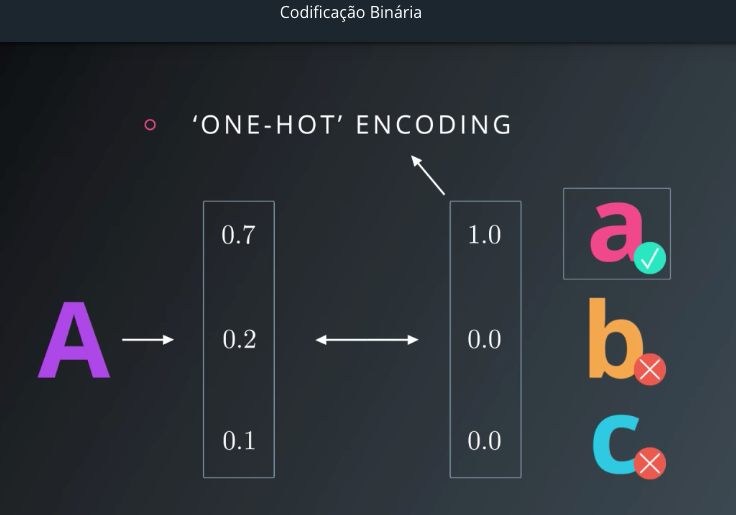

In [4]:
import numpy as np
from sklearn import preprocessing

# Exemplo de rótulos
labels = np.array([1,5,3,2,1,4,2,1,3])

# Crie o codificador
lb = preprocessing.LabelBinarizer()

# O codificador encontra as classes e cria os vetores codificados em binário
lb.fit(labels)

# Finalmente, os rótulos são transformados em vetores conectados em binário
lb.transform(labels)
# array([[1, 0, 0, 0, 0],
#            [0, 0, 0, 0, 1],
#            [0, 0, 1, 0, 0],
#            [0, 1, 0, 0, 0],
#            [1, 0, 0, 0, 0],
#            [0, 0, 0, 1, 0],
#            [0, 1, 0, 0, 0],
#            [1, 0, 0, 0, 0],
#            [0, 0, 1, 0, 0]])

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])